## Breast Cancer Detection

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Step-1 Data Exploration

In [2]:
dataa = pd.read_csv('data.csv')
dataa.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [3]:
# Check for all the null values
dataa.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
dataa.shape

(569, 33)

In [5]:
# As Unnamed feature have no contribution let's drop it
dataa.dropna(axis = 1 , inplace = True)

In [6]:
dataa.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
dataa['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

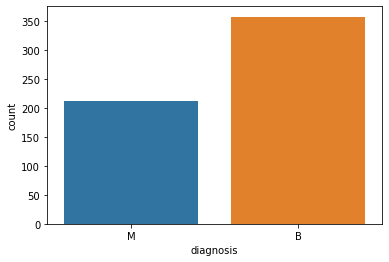

In [8]:
# Let's visualize it
sns.countplot(dataa['diagnosis'])

## Step-2 Categorical Data

In [9]:
# Alright now let's see all the categorical values
dataa.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
# Let's encode our label(Diagnosis)
from sklearn.preprocessing import LabelEncoder
lEncode = LabelEncoder()
dataa['diagnosis'] = lEncode.fit_transform(dataa['diagnosis'])

In [12]:
dataa['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

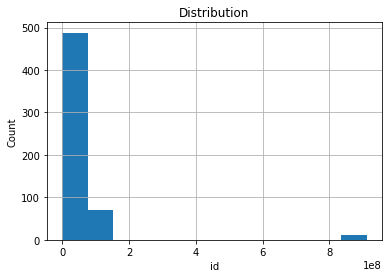

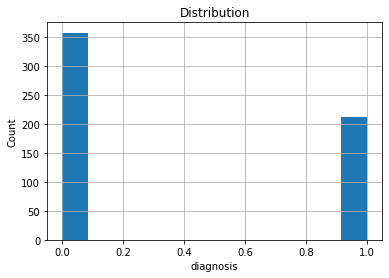

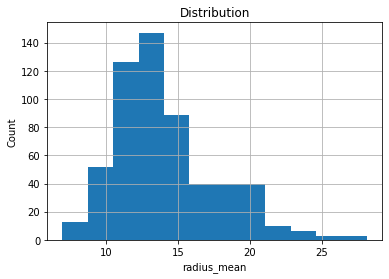

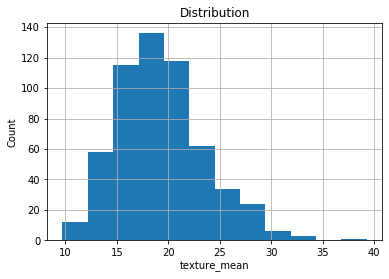

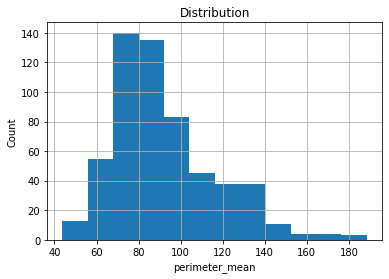

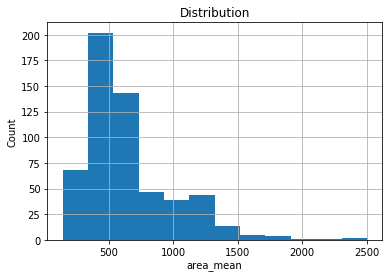

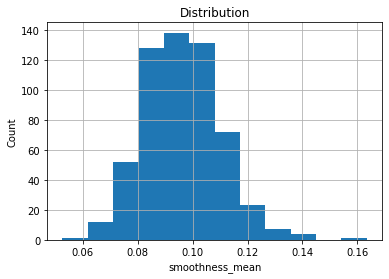

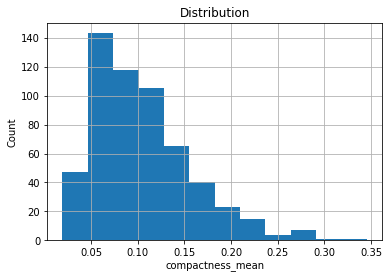

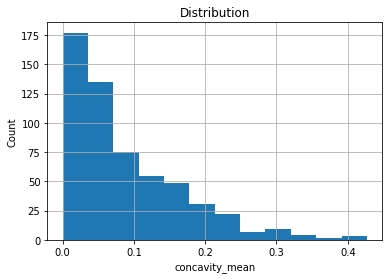

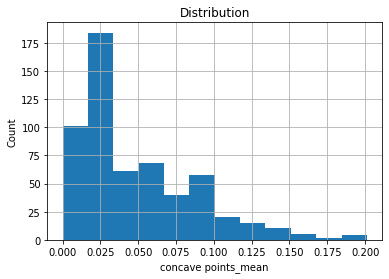

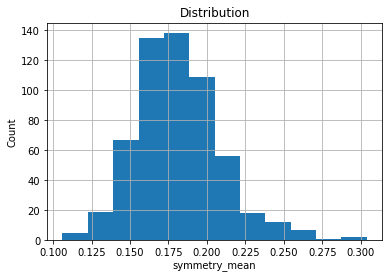

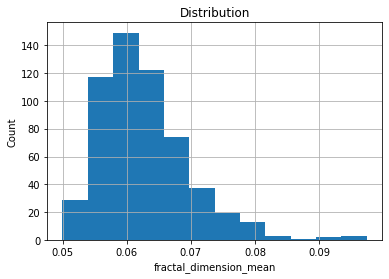

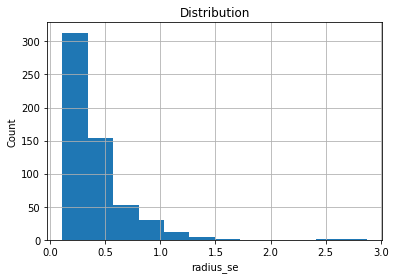

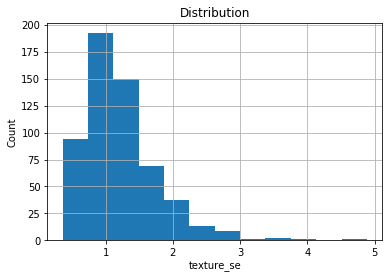

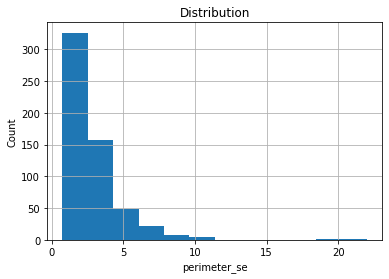

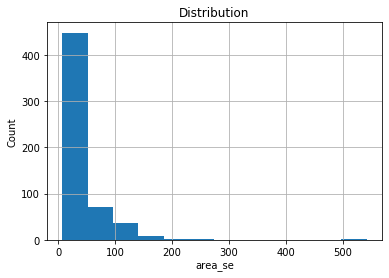

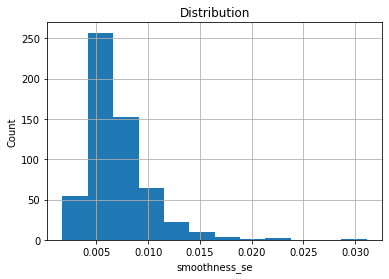

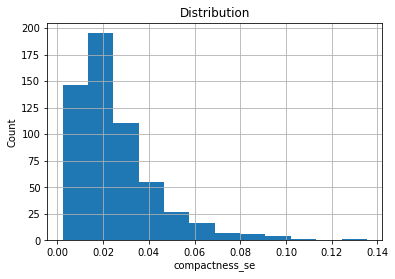

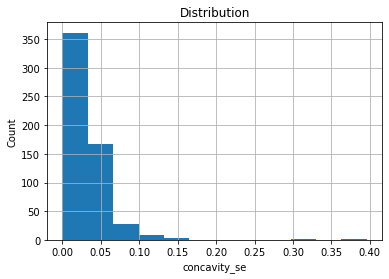

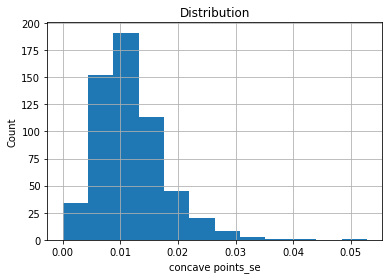

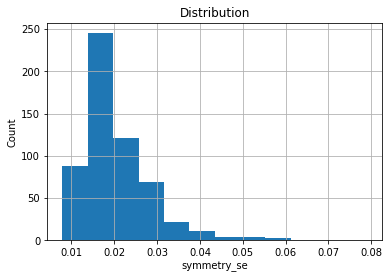

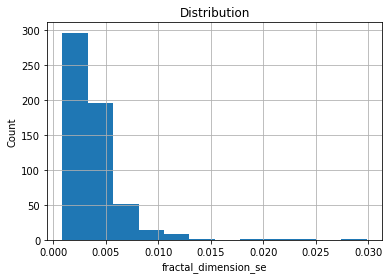

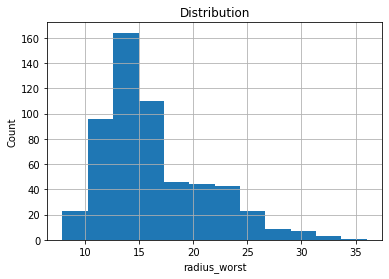

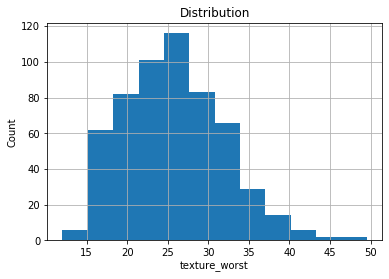

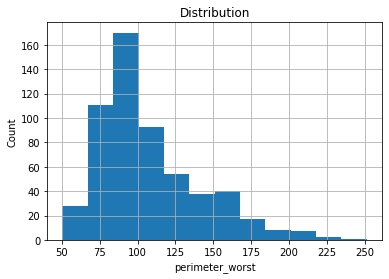

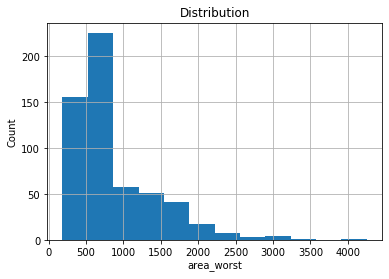

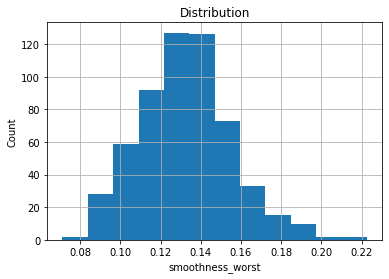

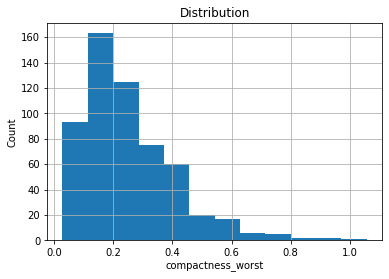

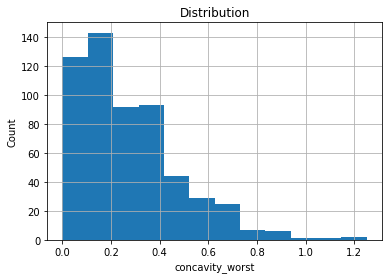

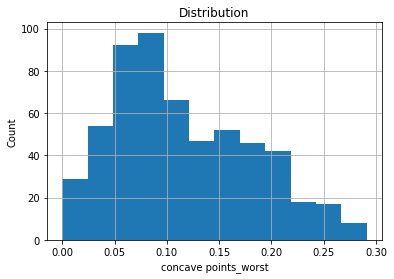

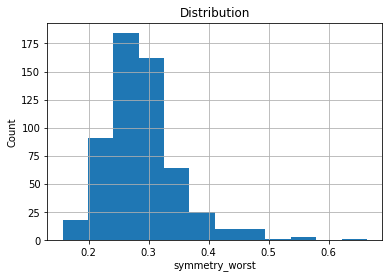

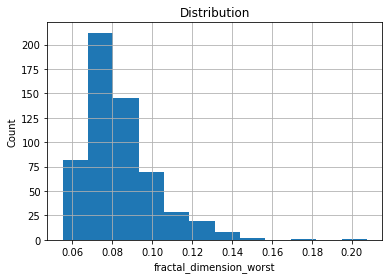

In [13]:
# Let's visualize the distribution of all the feature
for feature in dataa.columns:
    dataa[feature].hist(bins = 12)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Distribution')
    plt.show()

In [14]:
x , y = dataa.shape


In [15]:
dataa.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


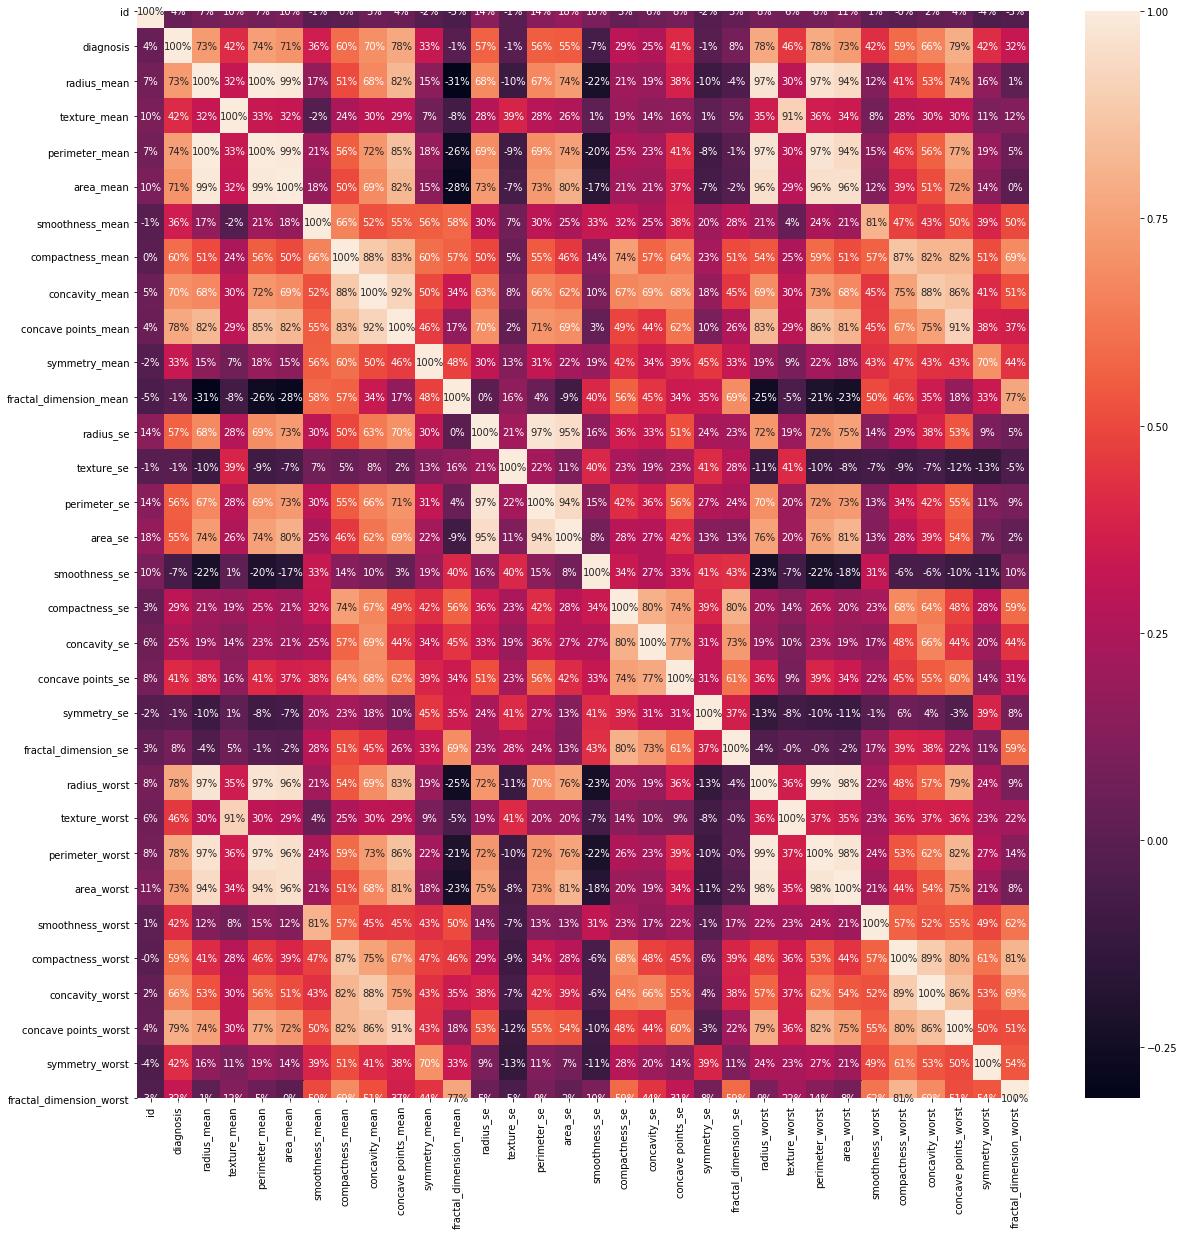

In [16]:
# Using heatmap 
plt.figure(figsize = (20,20))
sns.heatmap(dataa.corr(),annot = True,fmt = '.0%')

## Step-3 Split the dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(dataa.iloc[: , 2:31] , dataa.iloc[:,1] , random_state = 0 , test_size = 0.2)

## Step-4 Feature Scaling

In [18]:
# Let's scale our data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step-5 Model Selection

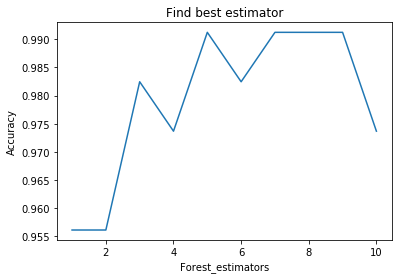

In [19]:
saveAccuracy = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators = i , criterion = 'entropy',random_state = 0 ).fit(X_train,y_train)
    saveAccuracy.append(metrics.accuracy_score(y_test,rf.predict(X_test)))
# Plotting graph for better value of Forest
plt.plot(range(1,11),saveAccuracy)
plt.xlabel('Forest_estimators')
plt.ylabel('Accuracy')
plt.title('Find best estimator')
plt.show()

## Now comparing randomforest with 99.1 accuracy testscore with other for finding more best score

In [20]:
def model(X_train , y_train):
    ## Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    
    ## Using Naive Bayes Algorithm to the Training Set
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    
     #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    ## Using KNN Algorithm to the Training Set
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train,y_train)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    print('[0]Logistic Regression Training Accuracy:', lr.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', nb.score(X_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    
    return lr , nb , svc_lin , svc_rbf , knn , tree , forest    

In [21]:
model = model(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.989010989010989
[1]K Nearest Neighbor Training Accuracy: 0.9802197802197802
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[4]Gaussian Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978


C:\Users\prashant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
model

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=0,
     shrinking=True, tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=0,
     shrinking=True, tol=0.001, verbose=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_

In [23]:
## Check the preformance of every model
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(y_test , model[i].predict(X_test))
    print('model[{}] confusio_matrix ->'.format(i))
    print()
    print(cm)
    print('Hence accuracy: ',(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0]))
    print()


model[0] confusio_matrix ->

[[65  2]
 [ 3 44]]
Hence accuracy:  0.956140350877193

model[1] confusio_matrix ->

[[62  5]
 [ 5 42]]
Hence accuracy:  0.9122807017543859

model[2] confusio_matrix ->

[[64  3]
 [ 1 46]]
Hence accuracy:  0.9649122807017544

model[3] confusio_matrix ->

[[67  0]
 [ 2 45]]
Hence accuracy:  0.9824561403508771

model[4] confusio_matrix ->

[[67  0]
 [ 5 42]]
Hence accuracy:  0.956140350877193

model[5] confusio_matrix ->

[[62  5]
 [ 3 44]]
Hence accuracy:  0.9298245614035088

model[6] confusio_matrix ->

[[66  1]
 [ 0 47]]
Hence accuracy:  0.9912280701754386



In [26]:
from sklearn import metrics
for i in range(len(model)):
    print('Model ',i)
    #Another way to get the models accuracy on the test data
    print( metrics.accuracy_score(y_test, model[i].predict(X_test)))
    print()#Print a new line

Model  0
0.956140350877193

Model  1
0.9122807017543859

Model  2
0.9649122807017544

Model  3
0.9824561403508771

Model  4
0.956140350877193

Model  5
0.9298245614035088

Model  6
0.9912280701754386



In [27]:
## As Random Forest with n_estimater = 8  perform the best
prediction = rf.predict(X_test)
print(prediction)
print()
print(y_test.values)


[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
